<a href="https://colab.research.google.com/github/nhattminh160901/Bai_Tap/blob/main/cv/cell_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image

In [ ]:
!pip -q install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RIF0x4QkxhV2Bkad5zag")
project = rf.workspace("minh-cqzzf").project("cell721")
dataset = project.version(8).download("clip")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 823.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
loading Roboflow workspace...
lo


Extracting Dataset Version Zip to cell721-8 in clip:: 100%|██████████| 4333/4333 [00:00<00:00, 8703.14it/s]


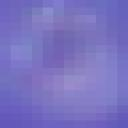

In [ ]:
Image.open("/content/cell721-8/train/cells/Image10_jpg.rf.000d01a4bd3b8c3dd4e98e26b6e8a29b.jpg")

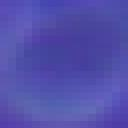

In [ ]:
Image.open("/content/cell721-8/test/dead_cells/Image6_jpg.rf.074af6cf40b3fb6bd29b3a49a74c8e04.jpg")

In [ ]:
train_dir = "/content/cell721-8/train"
validation_dir = "/content/cell721-8/valid"
test_dir = "/content/cell721-8/test"

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=10,
        shuffle=True)

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=10,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=10,
        shuffle=False)

Found 3124 images belonging to 2 classes.
Found 774 images belonging to 2 classes.
Found 421 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

input_shape = (128, 128, 3)
num_classes = 2

model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before the fully connected layers
model.add(Flatten())

# Add Dense (fully connected) layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer with the number of classes (adjust this according to your specific problem)
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model_checkpoint = ModelCheckpoint(
    "dir/model.keras",
    monitor="val_loss",
    mode="min",
    verbos=1)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

cb = [model_checkpoint, learning_rate_reduction]

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      epochs=50,
      validation_data=validation_generator, # display validation data test accuracy
      callbacks=cb
)

Epoch 1/50
313/313 [==============================] - 134s 422ms/step - loss: 0.1150 - accuracy: 0.9616 - val_loss: 0.0963 - val_accuracy: 0.9651 - lr: 0.0010
Epoch 2/50
313/313 [==============================] - 121s 385ms/step - loss: 0.0892 - accuracy: 0.9731 - val_loss: 0.4516 - val_accuracy: 0.8269 - lr: 0.0010
Epoch 3/50
313/313 [==============================] - 120s 383ms/step - loss: 0.1373 - accuracy: 0.9581 - val_loss: 0.0465 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 4/50
313/313 [==============================] - 120s 385ms/step - loss: 0.0483 - accuracy: 0.9834 - val_loss: 0.0249 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 5/50
313/313 [==============================] - 121s 387ms/step - loss: 0.0550 - accuracy: 0.9843 - val_loss: 0.0323 - val_accuracy: 0.9897 - lr: 0.0010
Epoch 6/50
313/313 [==============================] - 129s 412ms/step - loss: 0.0481 - accuracy: 0.9859 - val_loss: 0.0539 - val_accuracy: 0.9819 - lr: 0.0010
Epoch 7/50
313/313 [==========================

In [ ]:
model.save('dir/my_model.keras')

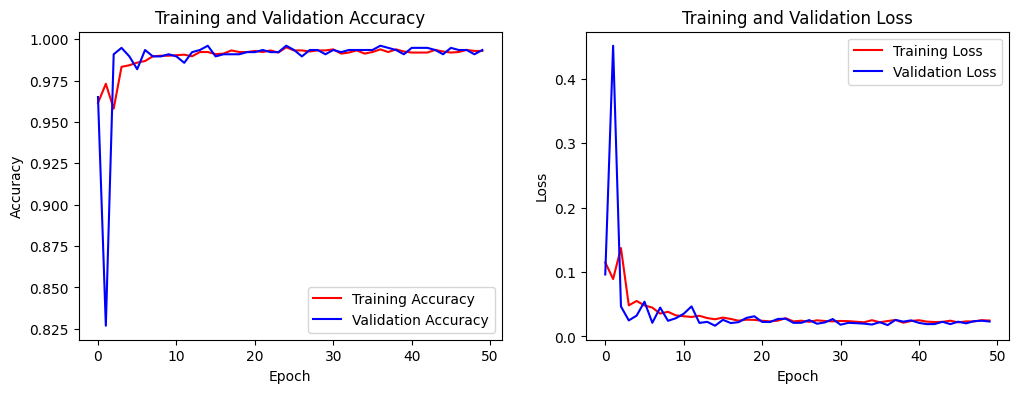

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,4)

# Define accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Define loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting accuracy
ax[0].plot(epochs, acc, 'r', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plotting loss
ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

plt.show()

In [ ]:
loss, acc = model.evaluate(test_generator)
print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % acc)

43/43 [==============================] - 4s 81ms/step - loss: 0.0711 - accuracy: 0.9810
Test loss: 0.0711
Test accuracy: 0.9810


In [ ]:
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred_prob_positive_class = y_pred_prob[:, 1]
y_pred = np.round(y_pred_prob_positive_class)

43/43 [==============================] - 5s 114ms/step


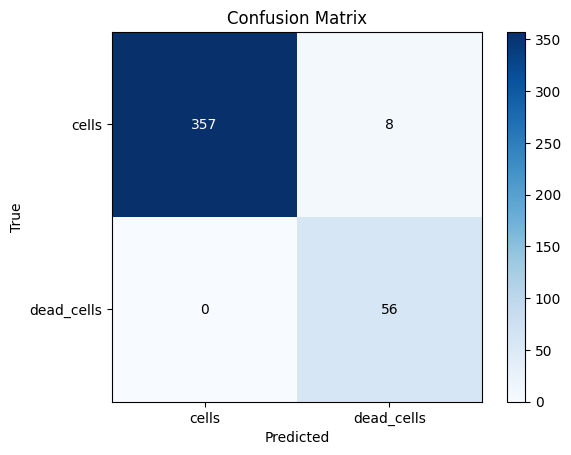

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, average_precision_score

conf_matrix = confusion_matrix(y_true, y_pred)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = list(test_generator.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
      if conf_matrix[i, j]>np.max(conf_matrix)/2:
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
      else:
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.9809976247030879
Mean Average Precision (mAP): 0.875
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       365
           1       0.88      1.00      0.93        56

    accuracy                           0.98       421
   macro avg       0.94      0.99      0.96       421
weighted avg       0.98      0.98      0.98       421

ROC AUC: 0.9890410958904109


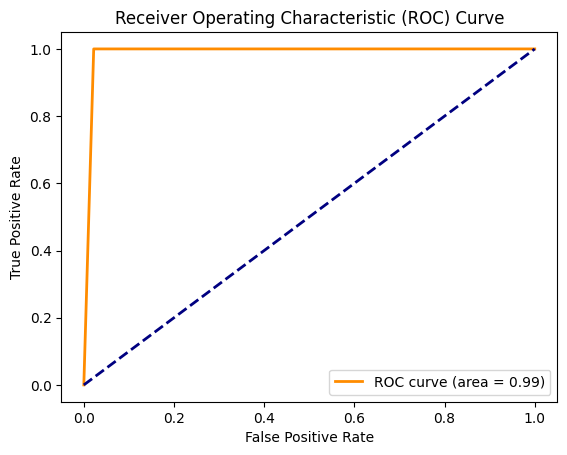

In [ ]:
# Metrics
accuracy = accuracy_score(y_true, y_pred)
mAP = average_precision_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc_curve = auc(fpr, tpr)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"Mean Average Precision (mAP): {mAP}")
print("Classification Report:")
print(classification_rep)
print(f"ROC AUC: {roc_auc}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_curve))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
load_model = tf.keras.models.load_model('/content/dir/my_model.keras')

# Show the model architecture
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
import os
from keras.preprocessing import image
total_cell = 0
total_deadcell = 0
test_dir_ = "/content/drive/MyDrive/test_"
for filename in os.listdir(test_dir_):
  if filename.endswith(".jpg") or filename.endswith(".png"):
    image_path = os.path.join(test_dir_, filename)
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    img_array /= 255.0

    predictions = load_model.predict(img_array, verbose=0)
    if predictions[0][0] > 0.5:
      total_cell+=1
    else:
      total_deadcell+=1
print("total cell:", total_cell)
print("total dead cell:", total_deadcell)

total cell: 357
total dead cell: 64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_features, train_labels = [], []
for _ in range(len(train_generator)):
    batch_features, batch_labels = train_generator.next()
    train_features.extend(batch_features)
    train_labels.extend(np.argmax(batch_labels, axis=1))

test_features, test_labels = [], []
for _ in range(len(test_generator)):
    batch_features, batch_labels = test_generator.next()
    test_features.extend(batch_features)
    test_labels.extend(np.argmax(batch_labels, axis=1))

# Flatten the features
train_features_flat = np.array(train_features).reshape(len(train_features), -1)
test_features_flat = np.array(test_features).reshape(len(test_features), -1)

In [ ]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features_flat, train_labels)

knn_predictions = knn.predict(test_features_flat)

# Evaluate the KNN model
knn_accuracy = knn.score(test_features_flat, test_labels)
print(f'Accuracy: {knn_accuracy * 100:.2f}%')

Accuracy: 97.86%


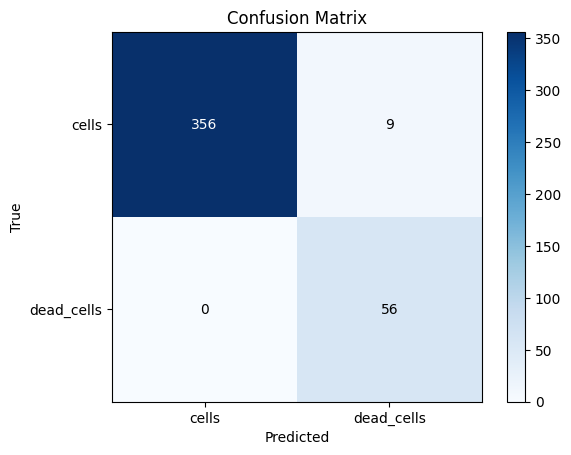

In [ ]:
knn_conf_matrix = confusion_matrix(test_labels, knn_predictions)

plt.imshow(knn_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = list(test_generator.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
      if knn_conf_matrix[i, j]>np.max(knn_conf_matrix)/2:
        plt.text(j, i, str(knn_conf_matrix[i, j]), ha='center', va='center', color='white')
      else:
        plt.text(j, i, str(knn_conf_matrix[i, j]), ha='center', va='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.9786223277909739
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       365
           1       0.86      1.00      0.93        56

    accuracy                           0.98       421
   macro avg       0.93      0.99      0.96       421
weighted avg       0.98      0.98      0.98       421

ROC AUC: 0.9876712328767123


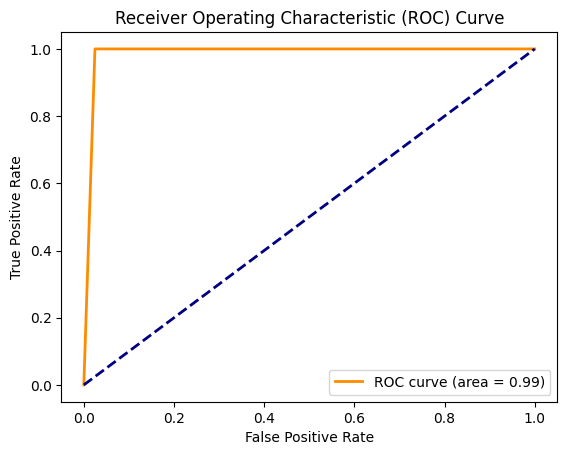

In [ ]:
# Metrics
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_classification_rep = classification_report(test_labels, knn_predictions)
knn_roc_auc = roc_auc_score(test_labels, knn_predictions)

# ROC Curve
knn_fpr, knn_tpr, knn_thresholds = roc_curve(test_labels, knn_predictions)
knn_roc_auc_curve = auc(knn_fpr, knn_tpr)

# Display metrics
print("Accuracy:", knn_accuracy)
print("Classification Report:")
print(knn_classification_rep)
print("ROC AUC:", knn_roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(knn_fpr, knn_tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(knn_roc_auc_curve))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
total_cell = 0
total_deadcell = 0
test_dir_ = "/content/drive/MyDrive/test_"
for filename in os.listdir(test_dir_):
  if filename.endswith(".jpg") or filename.endswith(".png"):
    image_path = os.path.join(test_dir_, filename)
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.reshape(1, -1)

    img_array /= 255.0

    predictions = knn.predict(img_array)
    if predictions == 0:
      total_cell+=1
    else:
      total_deadcell+=1
print("total cell:", total_cell)
print("total dead cell:", total_deadcell)

total cell: 356
total dead cell: 65
